# Classificação - Rede Neural

### Preprocess

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay




In [2]:
url = 'https://raw.githubusercontent.com/GabrielCamargoL/Machine_Learning-FATEC/test/cardioClassification/cardio_train.csv'
cardio = pd.read_csv(url, sep = ';')
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Tipos de dados
print(cardio.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [4]:
# Verifica se existem valores nulos
print(cardio.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [5]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(cardio[['cholesterol']])
cardio[ohe.categories_[0]] = transformed.toarray()

to_rename = {
    1 : 'normal_cholest',
    2 : 'above_cholest',
    3 : 'well_above_cholest',
}

cardio = cardio.rename(columns=to_rename)
cardio = cardio.drop(['cholesterol'], axis=1)

ohe2 = OneHotEncoder()
transformed = ohe2.fit_transform(cardio[['gluc']])
cardio[ohe2.categories_[0]] = transformed.toarray()

to_rename = {
    1 : 'normal_glucose',
    2 : 'above_glucose',
    3 : 'well_above_glucose',
}

cardio = cardio.rename(columns=to_rename)
cardio = cardio.drop(['gluc'], axis=1)

cardio['age']=cardio['age']/365

cardio = cardio.query('height >= 120 & height <=215 & weight >= 30')

cardio['bmi'] = cardio['weight']/((cardio['height']/100)**2)

cardio=cardio.drop(['height','weight'],axis=1)

cardio = cardio.query('70 < ap_hi < 240 & 40 < ap_lo < 140 & ap_hi > ap_lo')

cardio = cardio.astype({
            "age": 'int',
            "normal_glucose":'int', 
            "above_glucose":'int', 
            "well_above_glucose":'int',
            "normal_cholest":'int',
            "above_cholest":'int',
            "well_above_cholest":'int'
          }) 
cardio.head()

,id,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,normal_cholest,above_cholest,well_above_cholest,normal_glucose,above_glucose,well_above_glucose,bmi
0,0,50,2,110,80,0,0,1,0,1,0,0,1,0,0,21.967120
1,1,55,1,140,90,0,0,1,1,0,0,1,1,0,0,34.927679
2,2,51,1,130,70,0,0,0,1,0,0,1,1,0,0,23.507805
3,3,48,2,150,100,0,0,1,1,1,0,0,1,0,0,28.710479
4,4,47,1,100,60,0,0,0,0,1,0,0,1,0,0,23.011177


In [6]:
X = cardio.drop(['cardio'], axis=1)
y = cardio['cardio']

In [7]:
# Retira 20% para testar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Treina com 80%

model = MLPClassifier()

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000)

Acurácia: 0.51
Matriz de Confusão


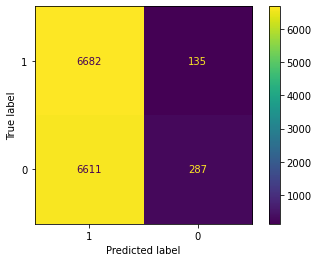

In [9]:

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()